In [72]:
import pandas as pd

In [73]:
car = pd.read_csv('car_data.csv')

In [74]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [75]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


#### CREATHING BACKUP COPY

# QUALITY

- names are inconsistent
- names have company names attached to it
- smap names like 'maruthi ertiga showroom conditioned with' and 'well maintained tata sumo'
- spam company names like'URGENT', 'Used' , 'i want to sell my car zest', 'URJE'
- years have non numerical value
- years value is in object
- price have non zero value like 'ask for price'
- price value is in object
- kms_driven have object value at last with its numericals
- kms_driven have non nummerical values
- fuel_type have nan values


# QUALITY

- names are inconsistent
- names have company names attached to it
- smap names like 'maruthi ertiga showroom conditioned with' and 'well maintained tata sumo'
- spam company names like'URGENT', 'Used' , 'i want to sell my car zest', 'URJE'
- fuel_type have nan values


# cleaning data 

### years have non numerical value

In [76]:
car=car[car['year'].str.isnumeric()]

### years value is in object 

In [77]:
car['year']=car['year'].astype(int)

### price have non numerical values 

In [78]:
car=car[car['Price']!='Ask For Price']

### price value is in object

In [79]:
car['Price']=car['Price'].str.replace(',','').astype(int)

### kms_driven have object value at lastt of its numericals

In [80]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

### kms driven have non numerical value

In [81]:
car=car[car['kms_driven'].str.isnumeric()]

In [82]:
car['kms_driven']=car['kms_driven'].astype(int)

### fuel types have naa values 

In [83]:
car=car[~car['fuel_type'].isna()]

In [84]:
car.shape

(816, 6)

## comapnys name have spammed the data so we are going to keep only first three words for a pricise naminng of the company 

In [85]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join('')

### before resetting the index of fianl cleaned data

In [86]:
car

,name,company,year,Price,kms_driven,fuel_type
0,HyundaiSantroXing,Hyundai,2007,80000,45000,Petrol
1,MahindraJeepCL550,Mahindra,2006,425000,40,Diesel
3,HyundaiGrandi10,Hyundai,2014,325000,28000,Petrol
4,FordEcoSportTitanium,Ford,2014,575000,36000,Diesel
6,FordFigo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,MarutiSuzukiRitz,Maruti,2011,270000,50000,Petrol
885,TataIndicaV2,Tata,2009,110000,30000,Diesel
886,ToyotaCorollaAltis,Toyota,2009,300000,132000,Petrol
888,TataZestXM,Tata,2018,260000,27000,Diesel


### resetting the index of the cleaned data

In [87]:
car=car.reset_index(drop=True)

### after resetting the cleaned data 

# cleaned data

In [88]:
car

,name,company,year,Price,kms_driven,fuel_type
0,HyundaiSantroXing,Hyundai,2007,80000,45000,Petrol
1,MahindraJeepCL550,Mahindra,2006,425000,40,Diesel
2,HyundaiGrandi10,Hyundai,2014,325000,28000,Petrol
3,FordEcoSportTitanium,Ford,2014,575000,36000,Diesel
4,FordFigo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,MarutiSuzukiRitz,Maruti,2011,270000,50000,Petrol
812,TataIndicaV2,Tata,2009,110000,30000,Diesel
813,ToyotaCorollaAltis,Toyota,2009,300000,132000,Petrol
814,TataZestXM,Tata,2018,260000,27000,Diesel


In [89]:
car.to_csv('cleaned_car_data.csv')

In [90]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


### cleaned data summary

In [91]:
car.describe (include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,MarutiSuzukiSwift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


### filtering the price of less than 60 lakhs

In [92]:
car=car[car['Price']<6000000]

# checking the relation of price with the companys name

In [93]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [94]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
import seaborn as sns

In [96]:
import numpy as np

In [97]:
import matplotlib.pyplot as plt


In [98]:
import matplotlib as mpl

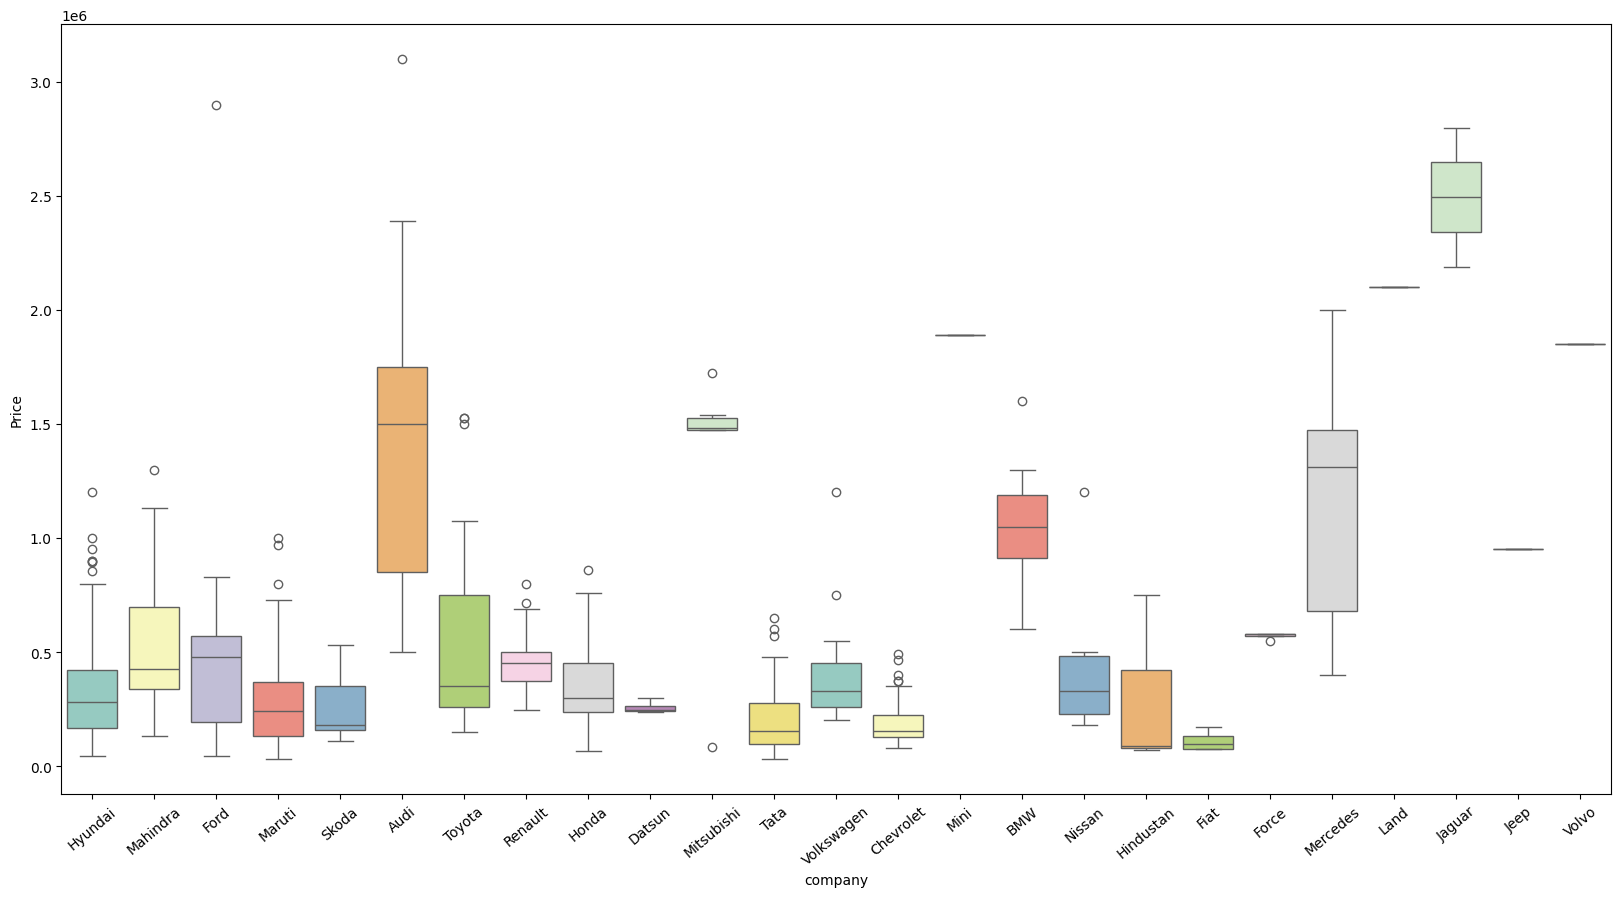

In [99]:
plt.subplots(figsize=(20,10))
ax=sns.boxplot(x='company',y='Price',data=car,hue='company',palette='Set3',legend=False)
ax.tick_params(axis='x', labelrotation=40)
plt.show()
                   

### checking relation of price with year

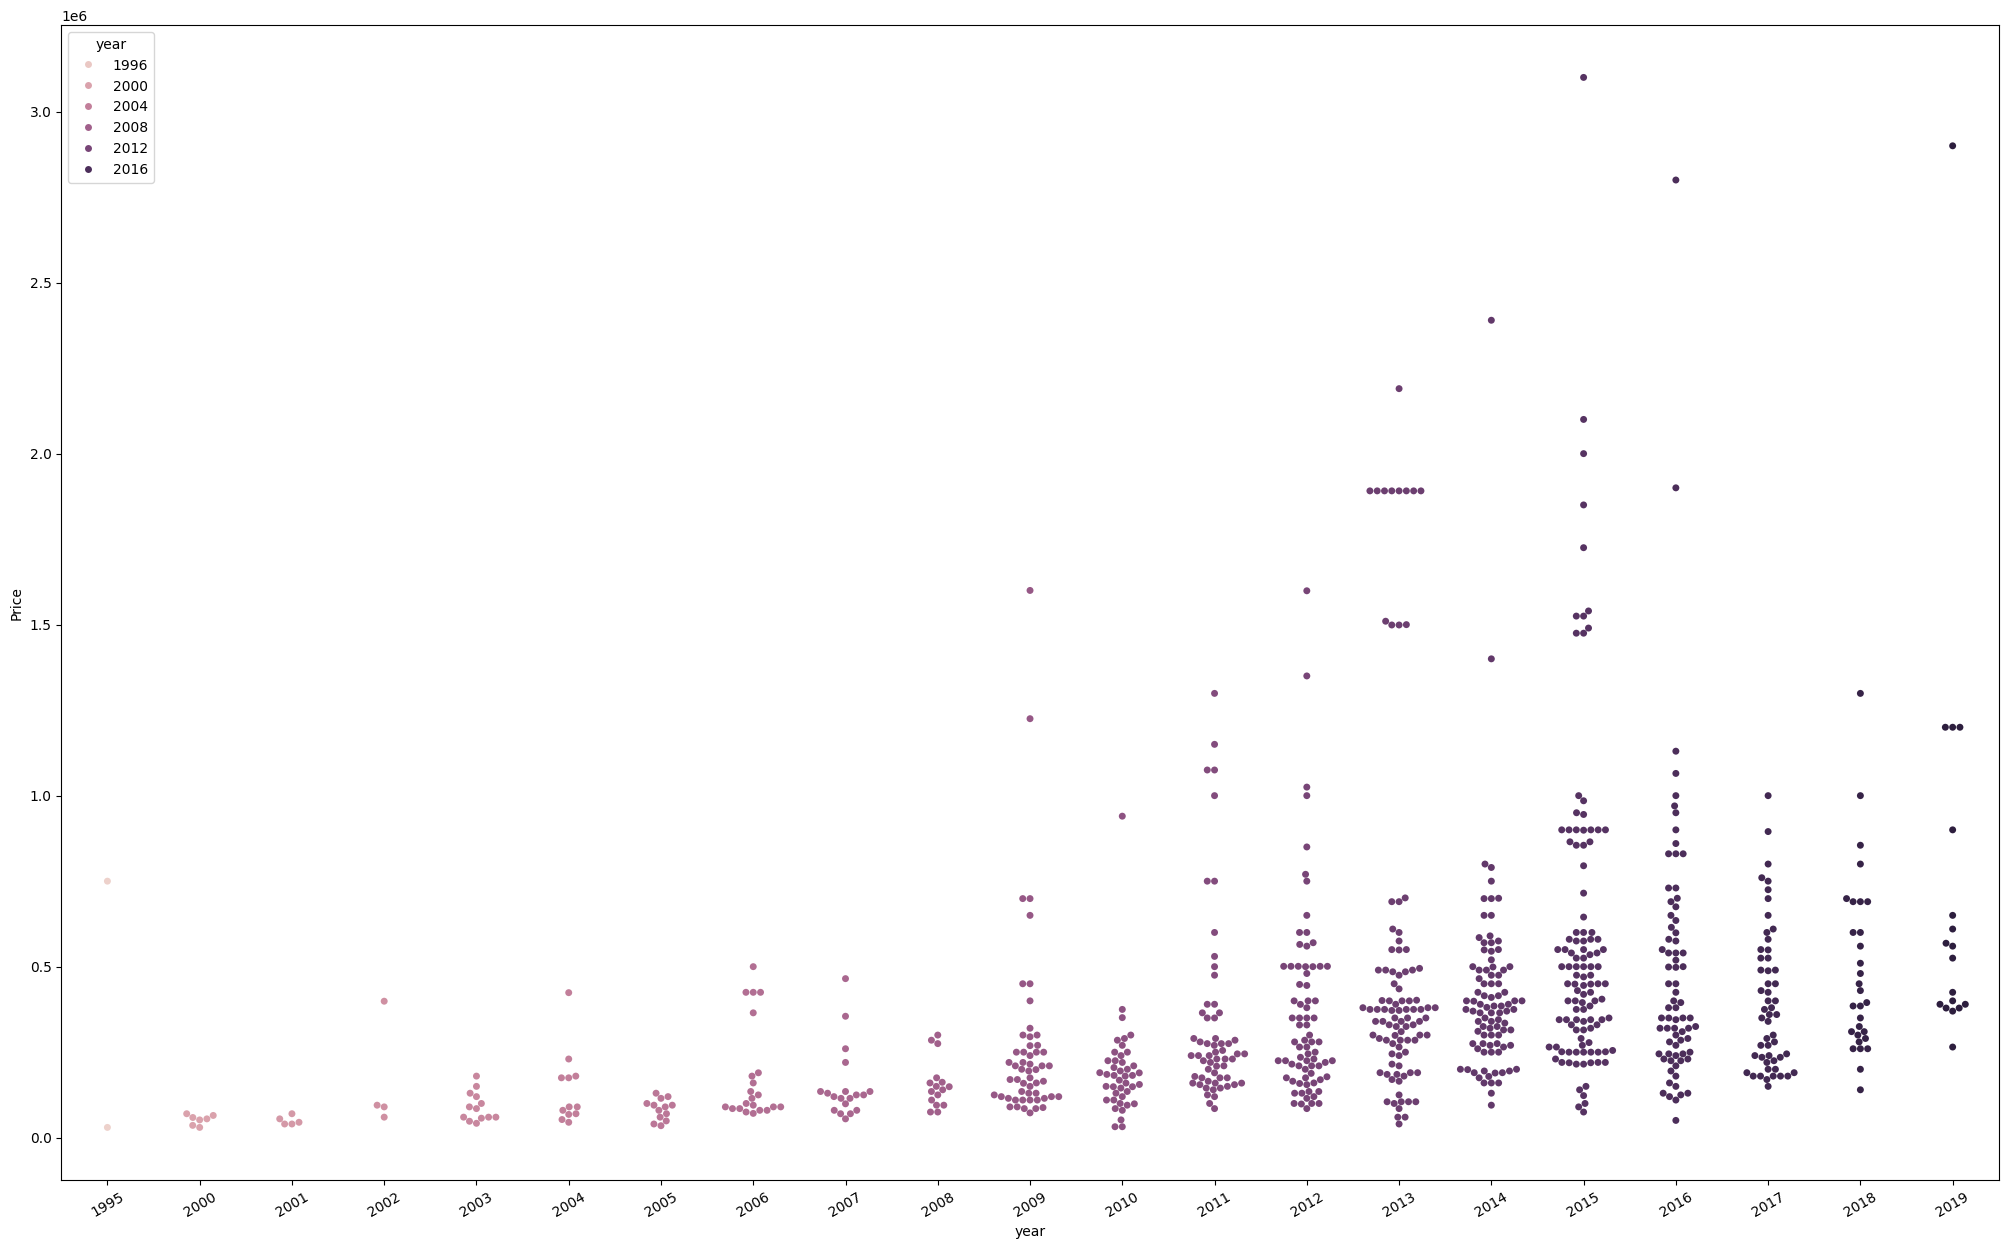

In [100]:
plt.subplots(figsize=(25,15))
ax=sns.swarmplot(x='year',y='Price',data=car,hue='year')
ax.tick_params(axis='x',labelrotation=30)
plt.show()

### checking relation of kms_driven with price

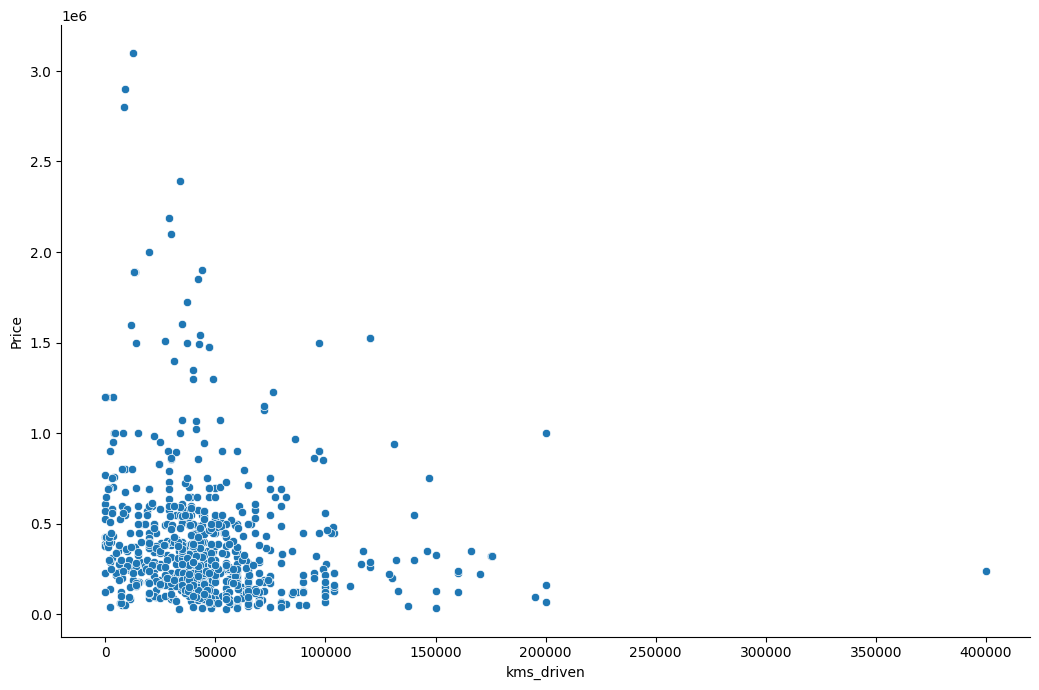

In [101]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### seeing the relation of price with the brand and kms driven

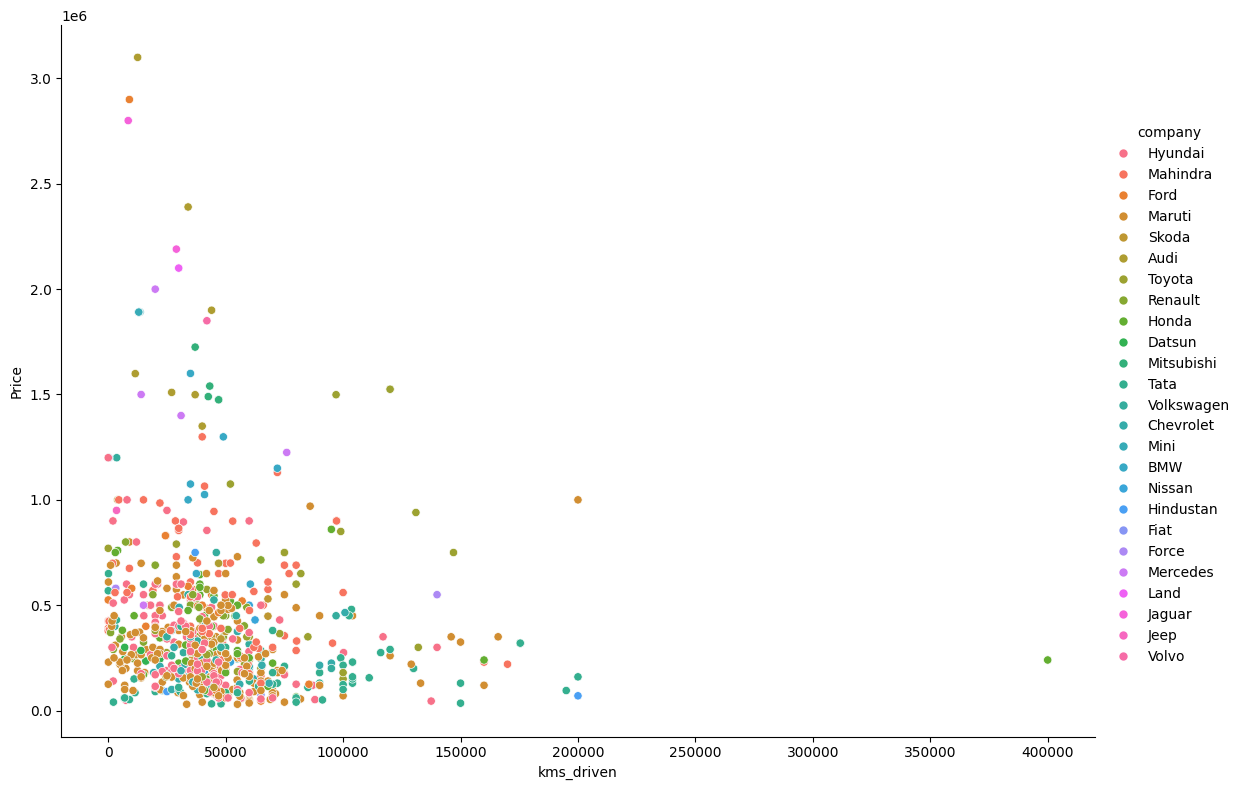

In [102]:
sns.relplot(x='kms_driven',y='Price',data=car,hue='company', height=8,aspect=1.4)

### checking the relashion of price with fuel_type

<Axes: xlabel='fuel_type', ylabel='Price'>

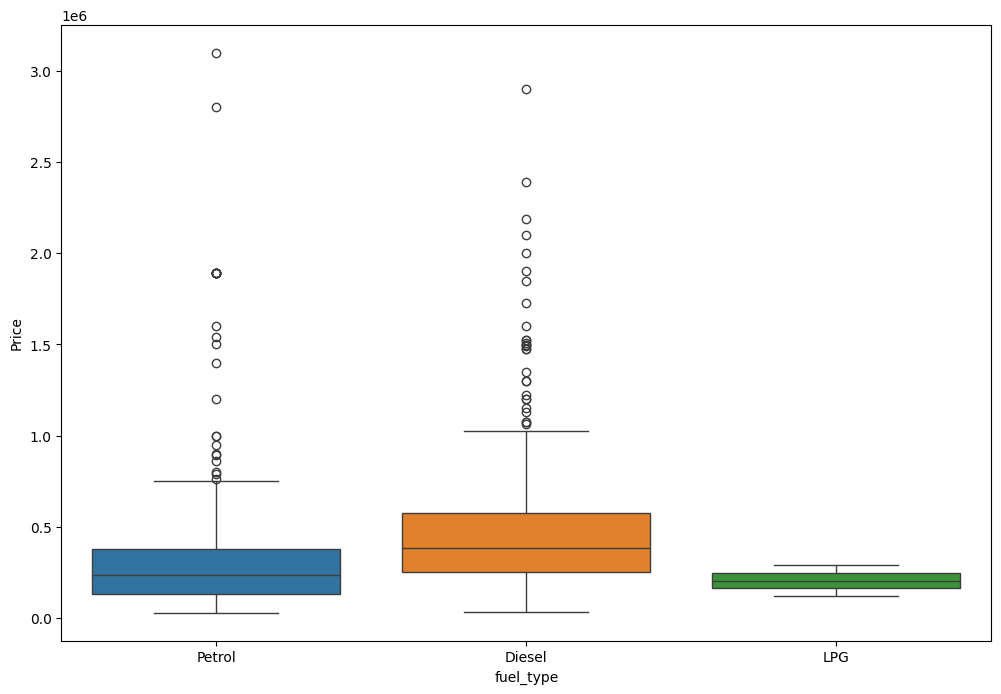

In [103]:
plt.subplots(figsize=(12,8))
sns.boxplot(y='Price',x='fuel_type',data=car,hue='fuel_type')

### relation of price with fueltype,year and brand

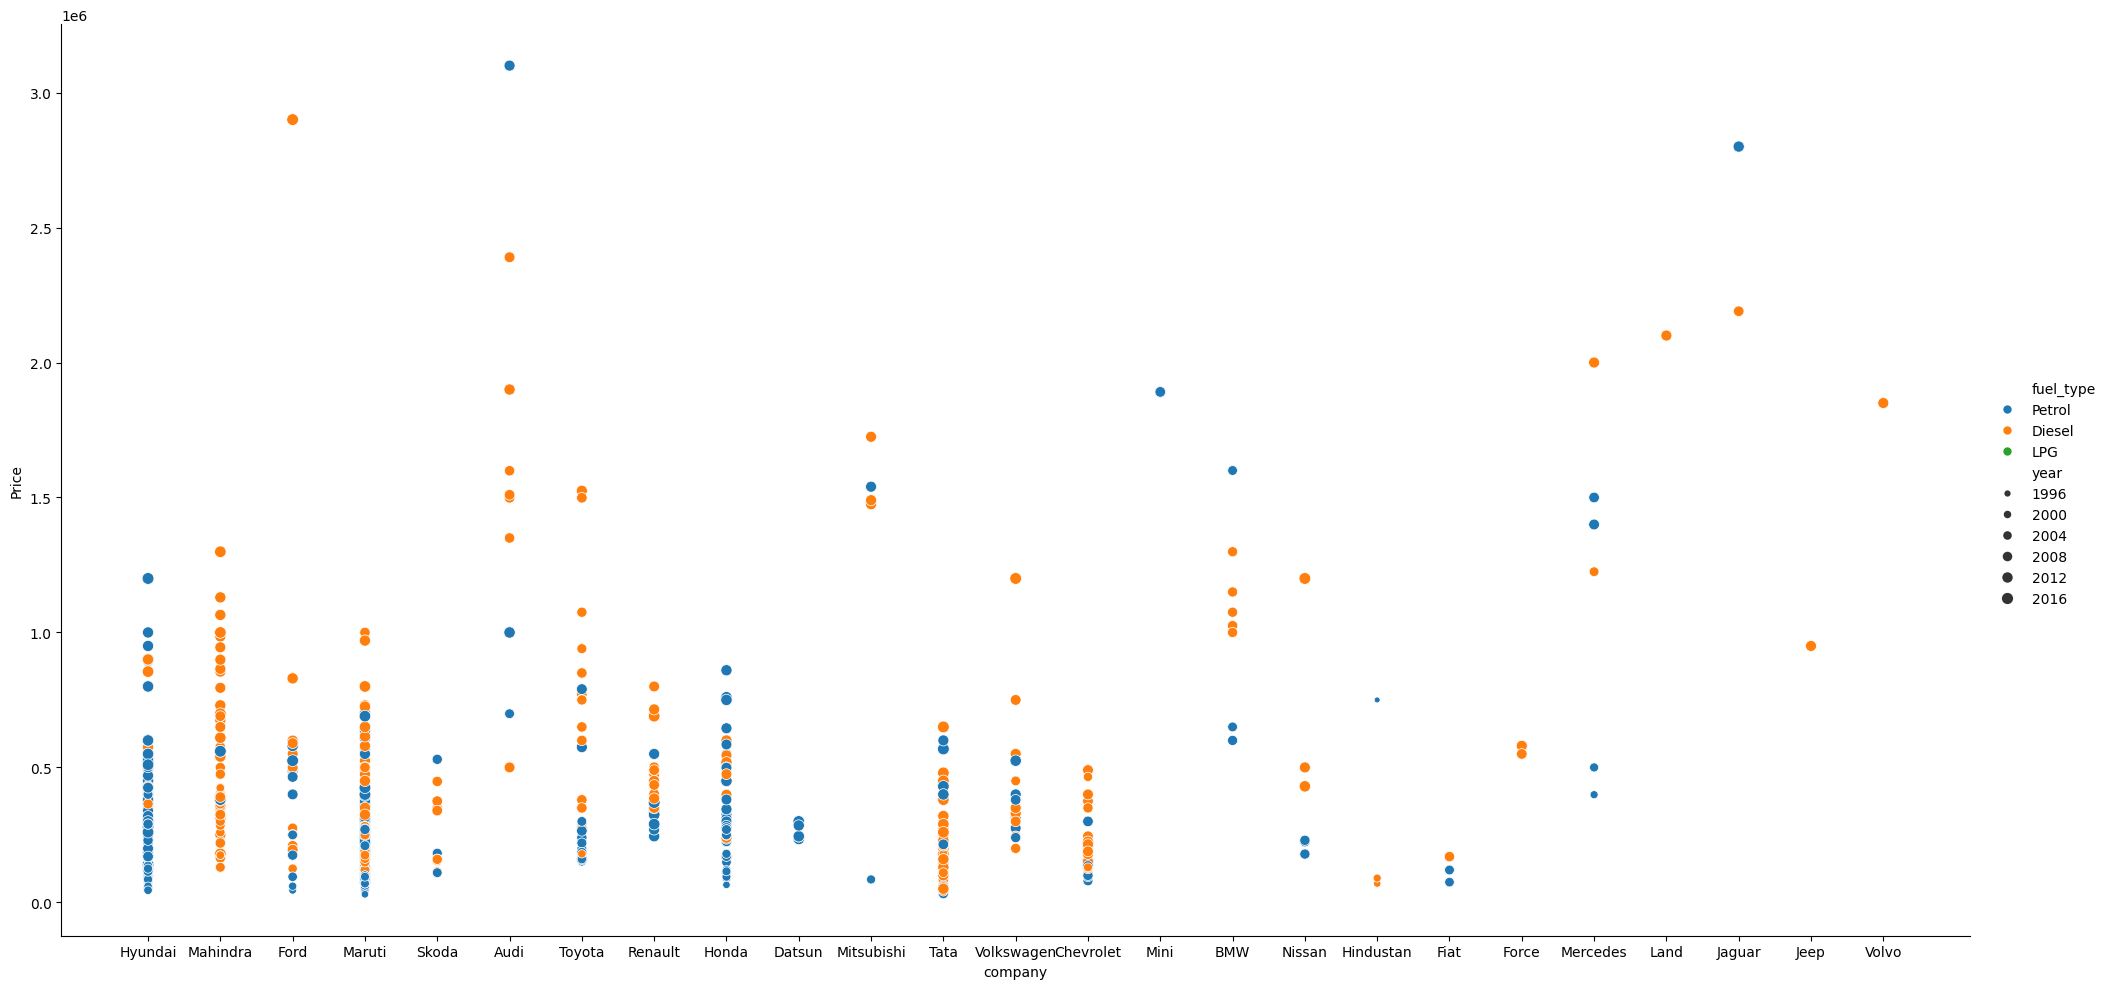

In [104]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=10,aspect=2)

# extracting training data

In [105]:
X=car[['name','company','year','kms_driven','fuel_type']]
Y=car['Price']

In [106]:
X

,name,company,year,kms_driven,fuel_type
0,HyundaiSantroXing,Hyundai,2007,45000,Petrol
1,MahindraJeepCL550,Mahindra,2006,40,Diesel
2,HyundaiGrandi10,Hyundai,2014,28000,Petrol
3,FordEcoSportTitanium,Ford,2014,36000,Diesel
4,FordFigo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,MarutiSuzukiRitz,Maruti,2011,50000,Petrol
812,TataIndicaV2,Tata,2009,30000,Diesel
813,ToyotaCorollaAltis,Toyota,2009,132000,Petrol
814,TataZestXM,Tata,2018,27000,Diesel


In [107]:
Y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int64

In [109]:
X.shape

(815, 5)

In [111]:
Y.shape

(815,)

# applying train test split

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [113]:
from sklearn.linear_model import LinearRegression

In [117]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['name', 'company', 'fuel_type']),
    remainder='passthrough'
)


### linear regression model

In [118]:
linear=LinearRegression()

### making a pipeline

In [119]:
pipe=make_pipeline(column_trans,linear)

### fitting the model

In [120]:
pipe.fit(X_train,Y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [121]:
y_prediction=pipe.predict(X_test)

### checking R2 score

In [122]:
r2_score(Y_test,y_prediction)

0.6938008826784806

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [124]:
scores=[]
for i in range (1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=i)
    #random state i is used to randomise our training model on how data is split and tested
    linear=LinearRegression()
    pipe=make_pipeline(column_trans,linear)
    pipe.fit(X_train,Y_train)
    y_predictionn=pipe.predict(X_test)
    scores.append(r2_score(Y_test,y_predictionn))

In [125]:
np.argmax(scores)

np.int64(302)

In [126]:
scores[np.argmax(scores)]

0.899115755487984

In [127]:
scores=[]
for i in range (1010):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=i)
    #random state i is used to randomise our training model on how data is split and tested
    linear=LinearRegression()
    pipe=make_pipeline(column_trans,linear)
    pipe.fit(X_train,Y_train)
    y_predictionn=pipe.predict(X_test)
    scores.append(r2_score(Y_test,y_predictionn))

In [128]:
np.argmax(scores)

np.int64(302)

In [129]:
scores[np.argmax(scores)]

0.899115755487984

In [130]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['MarutiSuzukiSwift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([419396.63516515])

### the best model is found at a certain random state

In [131]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=np.argmax(scores))
LinearRegression()
pipe=make_pipeline(column_trans,linear)
pipe.fit(X_train,Y_train)
y_predictionn=pipe.predict(X_test)
r2_score(Y_test,y_predictionn)

0.899115755487984

In [132]:
import pickle 

In [133]:
pickle.dump(pipe,open('linearRegressionModel.pk2','wb'))

In [134]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['MarutiSuzukiSwift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456670.32722791])

In [135]:
pipe.steps[0][1].transformers[0][1].categories[0]

'a'